# First Import modules to perform EDA

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## (1) Load and understand the dataset.

In [4]:
df = pd.read_csv('test.csv')
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Explore data rows and columns 

##### Get the first 5 rows of the data 

In [8]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##### Get the last 5 rows of the data 

In [12]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## (2) Calculate summary statistics for relevant variables.

In [26]:
numeric_data = df.describe()
category_data = df.describe(include=['object'])

In [28]:
print(numeric_data)

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [30]:
print(category_data)

                    Name   Sex    Ticket            Cabin Embarked
count                418   418       418               91      418
unique               418     2       363               76        3
top     Kelly, Mr. James  male  PC 17608  B57 B59 B63 B66        S
freq                   1   266         5                3      270


In [38]:
df.isnull().sum()  # check the number of  nan values in each column 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

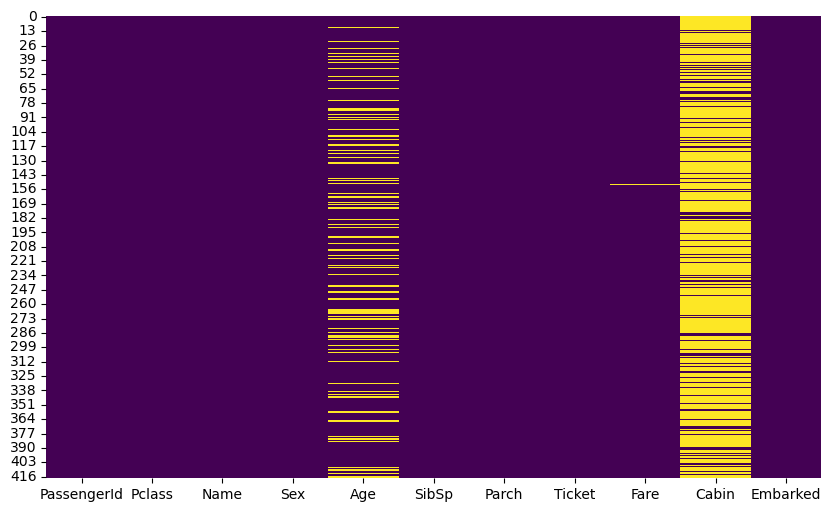

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

#### Data cleaning

In [55]:
df['Age'].fillna(df['Age'].mean())
df['Fare'].fillna(df['Fare'].mean())

Q1 = df_imputed['Fare'].quantile(0.25)
Q3 = df_imputed['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

## (3) Visualize the distribution of variables using histograms, bar plots

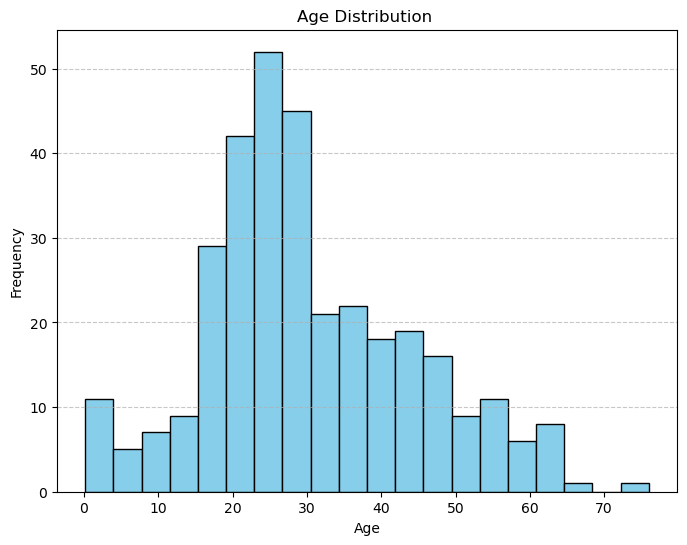

In [65]:
# Age using histograme
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution ')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\youse\AppData\Local\Temp\ipykernel_13780\1704594899.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Blues')


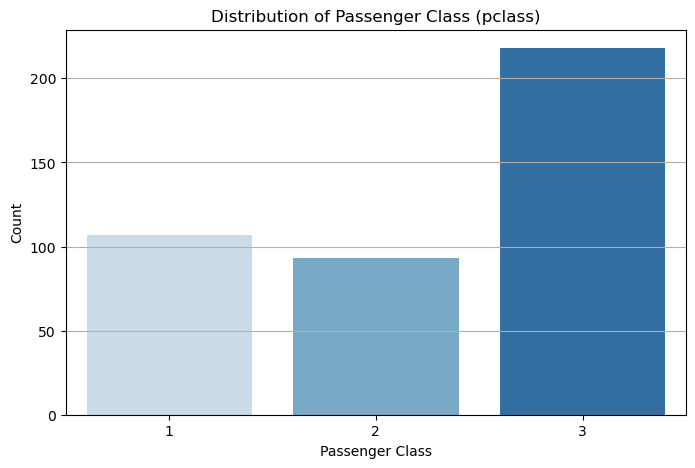

In [71]:
# Pclass using bar plots
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=df, palette='Blues')
plt.title('Distribution of Passenger Class (pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

C:\Users\youse\AppData\Local\Temp\ipykernel_13780\2290212949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Greens')


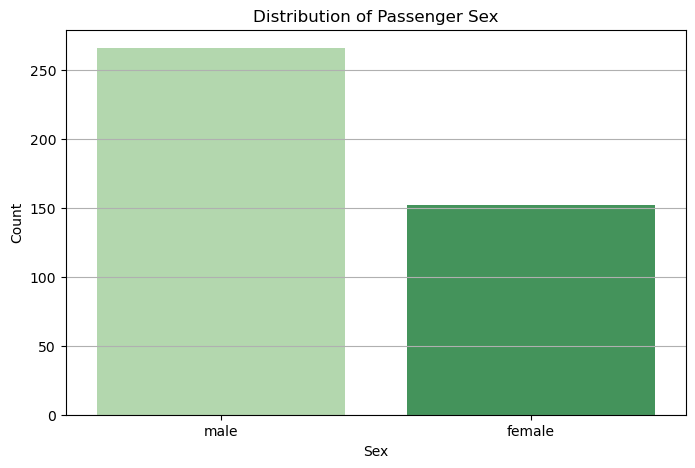

In [81]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df, palette='Greens')
plt.title('Distribution of Passenger Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

## (4) Explore relationships between variables using scatter plots and other visualizations.

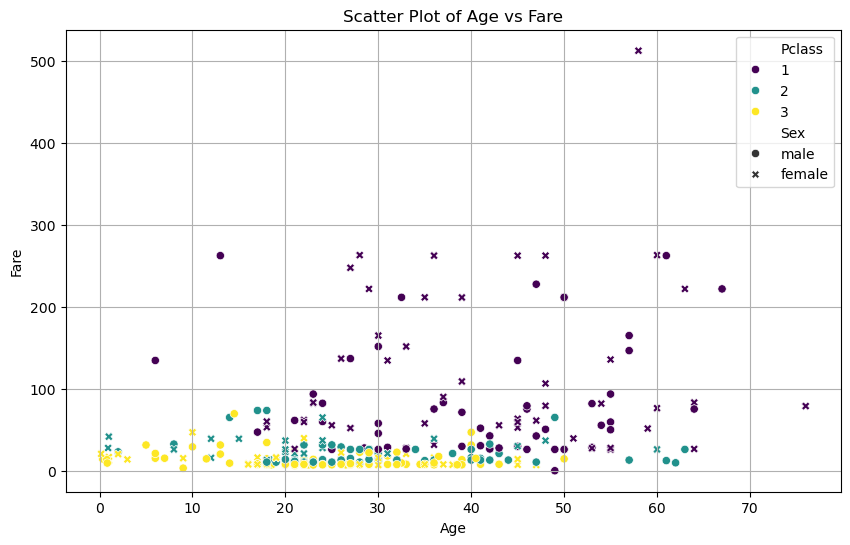

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Pclass', style='Sex', palette='viridis')
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid()
plt.show()

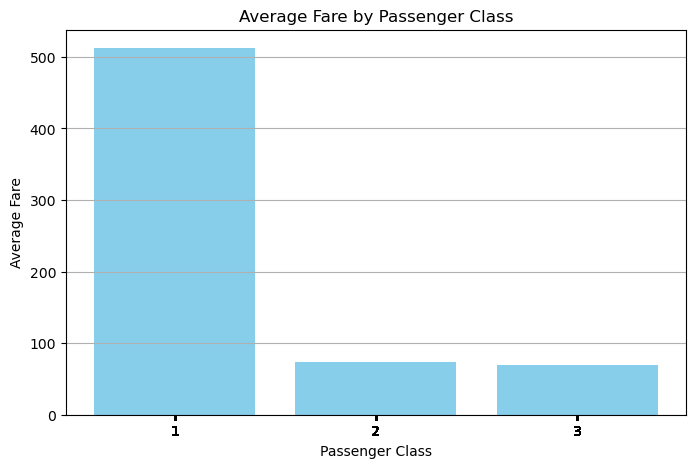

In [90]:
plt.figure(figsize=(8, 5))
plt.bar(df['Pclass'], df['Fare'], color='skyblue')
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.xticks(df['Pclass'])  # Set x-ticks to Pclass values
plt.grid(axis='y')
plt.show()


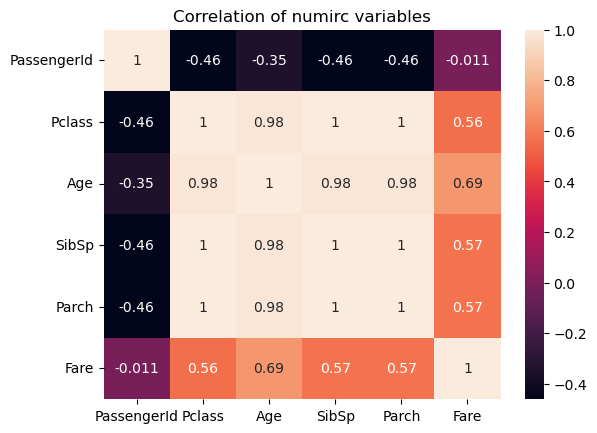

In [94]:
# Heatmap for correlations
corr = numeric_data.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation of numirc variables')
plt.show()

In [100]:
Identify_patterns = """
1: Descriptive Statistics Start by calculating basic statistics for your numerical columns to get a sense of the data.
2: Data Visualization Use visualizations to identify patterns and trends. (Histograms - Box Plots - Scatter Plots )
3: Correlation Analysis You can use a correlation matrix to identify relationships between numerical variables.              
"""
print(Identify_patterns)


1: Descriptive Statistics Start by calculating basic statistics for your numerical columns to get a sense of the data.
2: Data Visualization Use visualizations to identify patterns and trends. (Histograms - Box Plots - Scatter Plots )
3: Correlation Analysis You can use a correlation matrix to identify relationships between numerical variables.              



In [102]:
summary = """ 
1 : Descriptive Statistics: The average age of passengers is around 30 years.
Fare prices are right-skewed, indicating that most passengers paid lower fares, but a few paid significantly higher amounts

2 : Key Patterns: Higher classes (1st class) paid more than lower classes (2nd and 3rd).
Survival rates were higher for 1st class passengers, indicating better access to lifeboats.

3 : Trends:Younger passengers, especially children, had higher survival rates.
Women had a significantly higher survival rate than men.

4 : Anomalies:Outliers in fare prices, with some passengers paying extraordinarily high amounts.
Missing values in the Age column could bias results.

5 : Correlation Analysis:Strong negative correlation between Age and Fare: younger passengers tend to pay lower fares.
Weak correlations between family size variables (SibSp and Parch) and survival.
"""
print(summary)

 
1 : Descriptive Statistics: The average age of passengers is around 30 years.
Fare prices are right-skewed, indicating that most passengers paid lower fares, but a few paid significantly higher amounts

2 : Key Patterns: Higher classes (1st class) paid more than lower classes (2nd and 3rd).
Survival rates were higher for 1st class passengers, indicating better access to lifeboats.

3 : Trends:Younger passengers, especially children, had higher survival rates.
Women had a significantly higher survival rate than men.

4 : Anomalies:Outliers in fare prices, with some passengers paying extraordinarily high amounts.
Missing values in the Age column could bias results.

5 : Correlation Analysis:Strong negative correlation between Age and Fare: younger passengers tend to pay lower fares.
Weak correlations between family size variables (SibSp and Parch) and survival.

